# FastAI

In [24]:
!pip install -Uqq fastbook
import fastbook
from fastbook import *
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 73.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 115.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 86.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 91.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 36.1 MB/s eta 0:00:00
Mounted at /content/gdrive


## Downloading data sets

- FastAI provides easy access to a number of [datasets](https://docs.fast.ai/data.external.html)
- Use `untar_data` to download and extract the data set
- Gradient already has these has a public dataset that you can mount into your notebook


In [25]:
# By default this will be downloaded to `.fastai` in your home directory.
# In a container that is an ephemeral directory. Note the overloading of the `/` operator.
path = fastbook.untar_data(URLs.PETS)/'images'
path

Path('/root/.fastai/data/oxford-iiit-pet/images')

In [26]:
# We can also download the data into our notebook storage
path = fastbook.untar_data(URLs.PETS, data='/storage/data')/'images'
path

Path('/storage/data/oxford-iiit-pet/images')

## ImageDataLoaders
- Creates a `DataLoaders` object
- Here the book uses `ImageDataLoaders.from_name_func`
    - Path to working folder, where do you want to save things?
    - [get_image_files](https://docs.fast.ai/data.transforms.html#get_image_files) returns a list of paths, one for each image
    - validation percent is the percentage of images to hold out for validation


- Paperspace also provides several of the fastai datasets built-in as public datasets
- You can mount the fastai dataset and it will appear in `/datasets` without taking up any of your storage.

## Classification in pets dataset

- File name convention

In [27]:
def is_cat(x): return x[0].isupper()

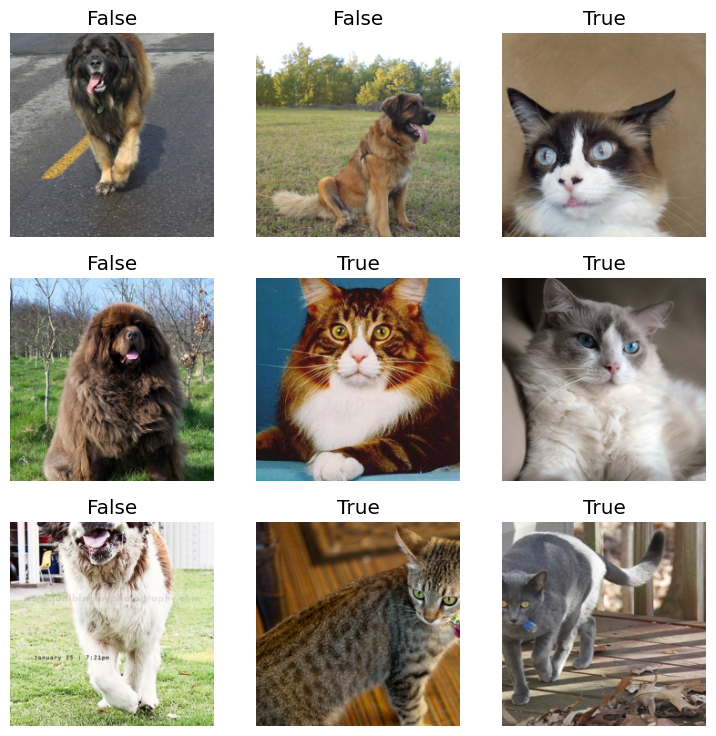

In [28]:
dls = ImageDataLoaders.from_name_func(
    Path('/notebooks/pets'), get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)
dls.show_batch()

In [29]:
dls.path

Path('/notebooks/pets')

## Training
- Given a set of labeled data
  - In this case images that are cat vs. not cat
- Assign weights to the neural network to minimize loss
- Done in a series of epochs
- Train on a batch of data
- Check how we are doing
- Update the weights.
- Repeat until .... ?

In [30]:
%%time
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 294MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.161424,0.026482,0.008796,00:15


epoch,train_loss,valid_loss,error_rate,time
0,0.059208,0.063600,0.014885,00:09
1,0.024663,0.020578,0.004736,00:08
2,0.012470,0.014406,0.006089,00:08


CPU times: user 23.5 s, sys: 6.07 s, total: 29.6 s
Wall time: 44.1 s


## Validation Set

- A portion of the training data is held out and not used to directly train the model.
- After each epoch calculate the loss compoared to the validation set.
- Gives us a better measure of how we are doing


## Pre-trained Models
- We aren't starting from scratch here
- Start with a professionally trained model (ResNet34)
- Often trained on ImageNet, other data sources
- Usually the model works OK without training, but not great
- Fine tune this model to our purpose and it works great

## Test Set

- Held out until the end.
- Not used to improve the model in any way.
- One shot at testing your model and then the test set is burned.
  - Can be folded into training / validation. But no longer a good test.
- Ideal case. Not everyone is always this strict

In [ ]:
# You will need to adjust this to get the images from the shared drive.
!mkdir -p data
!cp "/content/gdrive/MyDrive/Fall 2023/CS 320/data/gus.png" data
!cp "/content/gdrive/MyDrive/Fall 2023/CS 320/data/pan.png" data
!cp "/content/gdrive/MyDrive/Fall 2023/CS 320/data/sam-cat.png" data

In [ ]:
pets = SimpleNamespace(data = ['data/gus.png', 'data/pan.png', 'data/sam-cat.png'])

In [ ]:
pan = PILImage.create(pets.data[1])
gus = PILImage.create(pets.data[0])

In [ ]:
pan

In [ ]:
gus

In [ ]:
# is a cat?, class id, [probability not cat, probability cat]
learn.predict(pan)

('True', tensor(1), tensor([1.8896e-05, 9.9998e-01]))

In [ ]:
# is a cat?, class id, [probability not cat, probability cat]
learn.predict(gus)

('False', tensor(0), tensor([1.0000e+00, 1.2946e-07]))

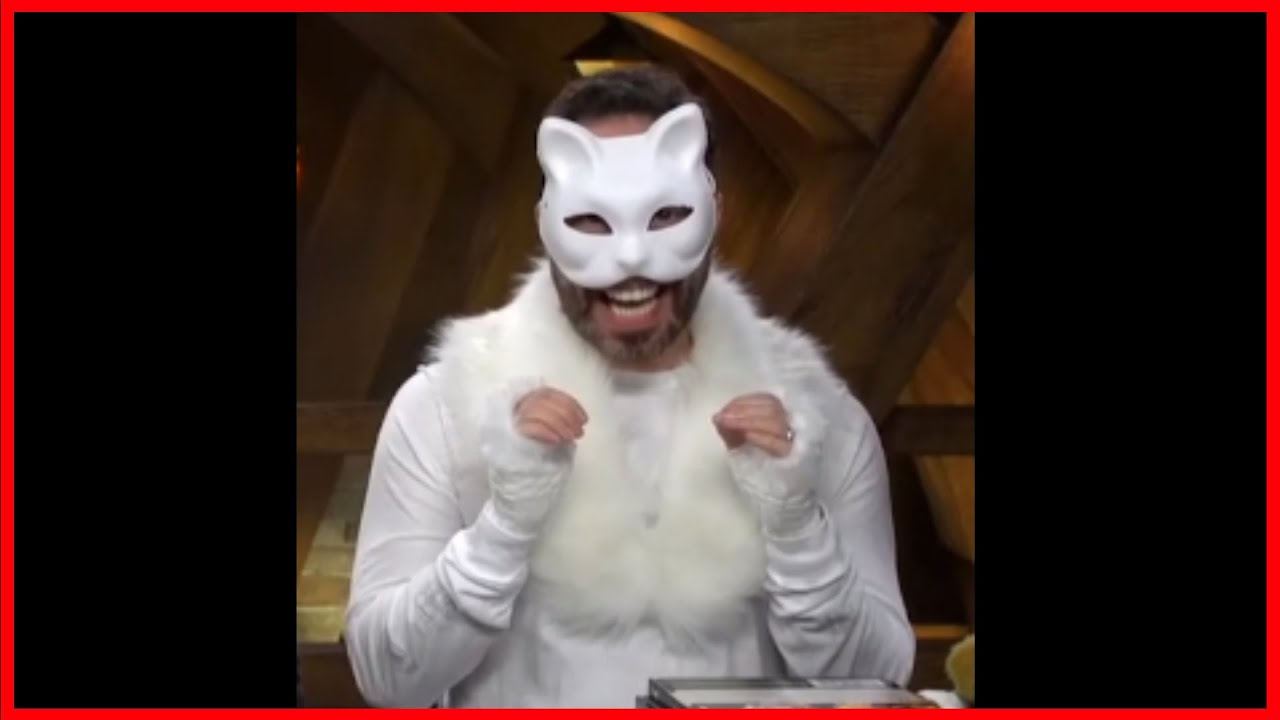

In [ ]:
sam = PILImage.create('data/sam-cat.png')
sam

In [ ]:
learn.predict(sam)

('True', tensor(1), tensor([0.0082, 0.9918]))